# **Analise 7**

Com essa analise foi possivel inferir qual a média do valor do frete por região e dias para entrega.

### **Importando Bibliotecas**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

#### **Importando Tabelas** 

In [2]:
items = pd.read_csv('./Files/Dataset/olist_order_items_dataset.csv')
orders = pd.read_csv('./Files/Dataset/olist_orders_dataset.csv')
state = pd.read_csv('./Files/Dataset/olist_customers_dataset.csv')
customers = pd.read_csv('./Files/Dataset/olist_customers_dataset.csv')

### **Merge**

#### **Juncao df**
Essas linhas de código realizam uma junção (merge) entre dois DataFrames, items e orders, utilizando a coluna 'order_id' como chave de junção. Aqui está a explicação detalhada:

coluna_juncao = ['order_id']: É criada uma lista chamada coluna_juncao que contém apenas o nome da coluna 'order_id'. Essa lista será usada como a chave de junção durante a operação de merge.

juncao_df = pd.merge(items, orders, on=coluna_juncao, how='inner'): A função pd.merge é usada para combinar os DataFrames items e orders com base na coluna 'order_id'. A junção é feita de forma interna (how='inner'), o que significa que apenas as linhas que têm correspondências em ambas as tabelas são mantidas no DataFrame resultante (juncao_df).

items: É o DataFrame que contém informações sobre itens em pedidos.

orders: É o DataFrame que contém informações sobre pedidos.

on=coluna_juncao: Indica a coluna usada como chave de junção, que é a coluna 'order_id'.

how='inner': Especifica o tipo de junção a ser realizada, que é uma junção interna. Isso garante que apenas as linhas com um valor correspondente em ambas as tabelas sejam incluídas no DataFrame resultante.

In [3]:
coluna_juncao = ['order_id']
juncao_df = pd.merge(items, orders, on=coluna_juncao, how='inner')

#### **Juncao State**
Essas linhas de código realizam outra operação de junção (merge) entre dois DataFrames, state e juncao_df, utilizando a coluna 'customer_id' como chave de junção. Aqui está a explicação detalhada:

coluna_state = ['customer_id']: É criada uma lista chamada coluna_state que contém apenas o nome da coluna 'customer_id'. Essa lista será usada como a chave de junção durante a operação de merge.

juncao_state = pd.merge(state, juncao_df, on=coluna_state, how='inner'): A função pd.merge é usada novamente para combinar os DataFrames state e juncao_df com base na coluna 'customer_id'. A junção é feita de forma interna (how='inner'), garantindo que apenas as linhas que têm correspondências em ambas as tabelas sejam mantidas no DataFrame resultante (juncao_state).

state: É o DataFrame que contém informações sobre o estado dos clientes, utilizando a coluna 'customer_id' como chave.

juncao_df: É o DataFrame resultante da junção anterior entre items e orders.

on=coluna_state: Indica a coluna usada como chave de junção, que é a coluna 'customer_id'.

how='inner': Especifica o tipo de junção a ser realizada, que é uma junção interna. Isso garante que apenas as linhas com um valor correspondente em ambas as tabelas sejam incluídas no DataFrame resultante.

In [4]:
coluna_state = ['customer_id']
juncao_state = pd.merge(state, juncao_df, on=coluna_state, how='inner')

### **Definindo e exibindo resultados**
* preco_medio_frete_por_uf = juncao_state.groupby(['customer_state'])['freight_value'].mean().reset_index(): Agrupa o DataFrame juncao_state por estados ('customer_state') e calcula a média do valor do frete para cada estado. O resultado é armazenado no DataFrame preco_medio_frete_por_uf.

* preco_medio_total_frete = preco_medio_frete_por_uf['freight_value'].mean(): Calcula a média geral do valor do frete considerando todos os estados. Isso é feito usando a coluna 'freight_value' do DataFrame preco_medio_frete_por_uf.

* print("Preço médio do frete por Estados é: ", preco_medio_total_frete): Imprime na tela o preço médio total do frete considerando todos os estados.

In [5]:
preco_medio_frete_por_uf = juncao_state.groupby(['customer_state'])['freight_value'].mean().reset_index()
preco_medio_total_frete = preco_medio_frete_por_uf['freight_value'].mean()
print("Preço médio do frete por Estados é: {:.2f}".format(preco_medio_total_frete))

Preço médio do frete por Estados é: 30.47


preco_medio_frete_por_uf = juncao_state.groupby(['customer_state'])['freight_value'].mean().reset_index()
preco_medio_frete_por_uf

In [6]:
preco_medio_frete_por_uf = juncao_state.groupby(['customer_state'])['freight_value'].mean().reset_index()
preco_medio_frete_por_uf['freight_value'] = preco_medio_frete_por_uf['freight_value'].round(2)
preco_medio_frete_por_uf


,customer_state,freight_value
0,AC,40.07
1,AL,35.84
2,AM,33.21
3,AP,34.01
4,BA,26.36
5,CE,32.71
6,DF,21.04
7,ES,22.06
8,GO,22.77
9,MA,38.26


### **Junção Tabela Dias médias**
* A junção foi necessária para realizar as análises de média de dias de entrega ordenado por região. Os data sets separados não continham as informações necessárias para a análise, em um dataset havia os pedidos e as entregas identificadas pelo customer_id e no outro data set havia a identificação do local onde este customer está cadastrado.

* Sendo assim após a junção podemos identificar qual região o customer está cadastrado e mensurar os prazos de entrega por região obtendo um dataset mais completo que possibilitará diversas análises. 

In [7]:
# variável que recebe a coluna em comum nos dois datasets base para a junção
coluna_juncao = ['customer_id']

# tabelas_combinadas recebem um merge atribuindo os dois datasets e realizando a junção em um único dataset 
tabelas_combinadas = pd.merge(customers, orders, on = coluna_juncao, how= 'inner')

# dataset resultado da junção salvo em CSV agora inicar as análises baseado nas perguntas do projeto 
tabelas_combinadas.to_csv('Files/Arquivos Projeto/juncao_orders_customers.csv', index=False)

In [8]:
# Criando um datafram chamado tabelas combinadas
df = pd.DataFrame(tabelas_combinadas)
print('Data frame criado com sucesso')

# agrupando por estado para após realizar a média
print('2. Agrupando por estado')
clientes_por_uf = df.groupby('customer_state')
print('Agrupamento concluido')

# criado um laço for para imprimir os dados de clientes no estado
for estado, dados in clientes_por_uf: 
    print('f\nClientes no estado{estado}:\n')
    print(dados)

Data frame criado com sucesso
2. Agrupando por estado
Agrupamento concluido
f
Clientes no estado{estado}:

                            customer_id                customer_unique_id  \
828    94906d652f7d1c9e4c4af604ede7784b  544d0f13064dc42b8f6957cf43fa5cad   
1684   ca077dd95290191565abb393a580bbfc  70f326d437e44cf69da00c9169b74fb3   
2638   5a5f70fead43dc16ec4d5afed5281239  b1cf91f7efd99001549d2eafa05c66c1   
4937   c5de7db594b246f428940ced283125bd  8c792a4fb7f5d708257abf55fa899ce8   
5674   16aba5570b45f6b4c9204407132e2cae  5f8f12098427d3cbb37e9dcf269bb53c   
...                                 ...                               ...   
93710  929cb7b1618f0d99c7814d79b0c5b7cc  3cd07f2cd0e3bd52f3896c0048fb37c7   
94386  013bdb994a9c8f09fde3f5f543e698ad  ba425b1bf6cab11cc601255a30cd3bdd   
95375  3298a35f24f353765e2570b3648550f4  d7f374aa64da050d8e7bb9332128a1e8   
97501  3b84c81b13c1c7278b099793e720998f  8d6512fa0e1c5cdbd789b956de79fe2f   
97507  0f32385df13e46d88d997460208bc866  4f671

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


In [13]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

In [14]:
# calculando o tempo de entrega em dias  e armazenando em uma nova coluna
df['tempo_entrega'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [15]:
# Calculando a média do tempo de entrega por uf
media_entrega_uf = df.groupby('customer_state')['tempo_entrega'].mean().reset_index()

In [20]:
print('Média de entrega por estado em dias:\n')
print(media_entrega_uf.round(0))

Média de entrega por estado em dias:

   customer_state  tempo_entrega
0              AC           21.0
1              AL           24.0
2              AM           26.0
3              AP           27.0
4              BA           19.0
5              CE           21.0
6              DF           13.0
7              ES           15.0
8              GO           15.0
9              MA           21.0
10             MG           12.0
11             MS           15.0
12             MT           18.0
13             PA           23.0
14             PB           20.0
15             PE           18.0
16             PI           19.0
17             PR           12.0
18             RJ           15.0
19             RN           19.0
20             RO           19.0
21             RR           29.0
22             RS           15.0
23             SC           14.0
24             SE           21.0
25             SP            8.0
26             TO           17.0


In [21]:
media_entrega_uf.to_csv('Files/Arquivos Projeto/media_entrega_uf.csv', index=False)
preco_medio_frete_por_uf.to_csv('Files/Arquivos Projeto/preco_medio_frete_por_uf.csv', index=False)

In [22]:
juncao_column = ['customer_state']

In [25]:
medias_frete_dias_juncao = pd.merge(media_entrega_uf, preco_medio_frete_por_uf, on=juncao_column, how='inner')
medias_frete_dias_juncao

,customer_state,tempo_entrega,freight_value
0,AC,20.637500,40.07
1,AL,24.040302,35.84
2,AM,25.986207,33.21
3,AP,26.731343,34.01
4,BA,18.866400,26.36
5,CE,20.817826,32.71
6,DF,12.509135,21.04
7,ES,15.331830,22.06
8,GO,15.150741,22.77
9,MA,21.117155,38.26


In [27]:
# DF ordenado de forma decrescente concentrando-se no valor do frete como base da análise
df_ordem_decrescente = medias_frete_dias_juncao.sort_values(by ='freight_value', ascending=False)
df_ordem_decrescente

,customer_state,tempo_entrega,freight_value
21,RR,28.975610,42.98
14,PB,19.953578,42.72
20,RO,18.913580,41.07
0,AC,20.637500,40.07
16,PI,18.993697,39.15
9,MA,21.117155,38.26
26,TO,17.226277,37.25
24,SE,21.029851,36.65
1,AL,24.040302,35.84
13,PA,23.316068,35.83


## **CONCLUSÃO DAS ANÁLISES**
#### **LOGÍSTICA**
* Roraima lidera o ranking como estado com a maior média de frete com R$ 42,98 e 29 dias para entrega;
* Paraíba na sequência com segunda posição tendo R$ 42,78 de média do valor de frete com 20 dias média como prazo de entrega;
* Analisando este DF podemos estabelecer rotas logísticas que facilitem as entregas nas regiões NORTE e NORDESTE, isso possibilitaria MENORES prazos e VALORES nos fretes;
* Explorando incentivos fiscais em Estados situados nestas regiões e mão de obra, pode ser viável estabelecer pequenos centros de distribuição nas regiões citadas nesta análise proporcionando uma operação mais eficaz e diminuição dos custos operacionais; 
* Para demais Estados onde identificamos gargalos operacionais e custos mais elevados podemos adotar medidas semelhantes levando em consideração desde incentivos fiscais, malha viária disponível na região e modais de entrega mais adequados para a operação visando agilidade, qualidade e custo mínimo impactando na qualidade da entrega e tempo.
* SEGUNDA OPÇÃO - seria a adoção de veículos agregados em pontos estratégicos que podem realizar as entregas estabelecidas por rotas, podemos explorar desde pequenos utilitários como VANS, PICK-UPS, FURGÕES, MOTOCICLETAS entre outros disponíveis na região com o intuito de dimiuir os prazos de entrega. 
* A adoção de uma frota de drones podem realizar pequenas entregas guiadas por GEOLOCALIZAÇÃO, capitais e regiões metropolitanas poderiam ser beneficiadas por este modal tecnologico.

#### **EXPERIÊNCIA DO CLIENTE**
* Adequados aos parâmetros de VALOR DE FRETE X PRAZO DE ENTREGA podemos realizar ações de marketing e publicidade focando principalmente na vantagem do cliente em comprar através de nossas plataformas e obter um valor mais adequado à sua compra e um prazo de entrega muito menor que os concorrentes;
* Com centros logísticos instalados em regiões estratégicas podemos dispôr da opção RETIRE AQUI, onde o cliente pode ir até uma agência para retirar sua compra e obter desde FRETE GRÁTIS até um valor inferior no frete caso fosse entregue em sua casa; 
* COm a adoção de tecnologia para entrega dde pedidos (DRONES) podemos incentivar o consumo CONSCIENTE onde deixamos de emitir toneladas de CO2 na atmosfera utilizando um modal tecnológico elétrico e ecologicamente correto destinando as compras dos clientes até suas residências de forma mais assertiva, tecnológica e ágil do que os meios convencionais. AINDA reforçando o uso da tecnologia podemos mostrar aos clientes que esta modalidade também colabora para a diminuição de veículos nas vias públicas contribuindo para um trânsito menos congestionado. 

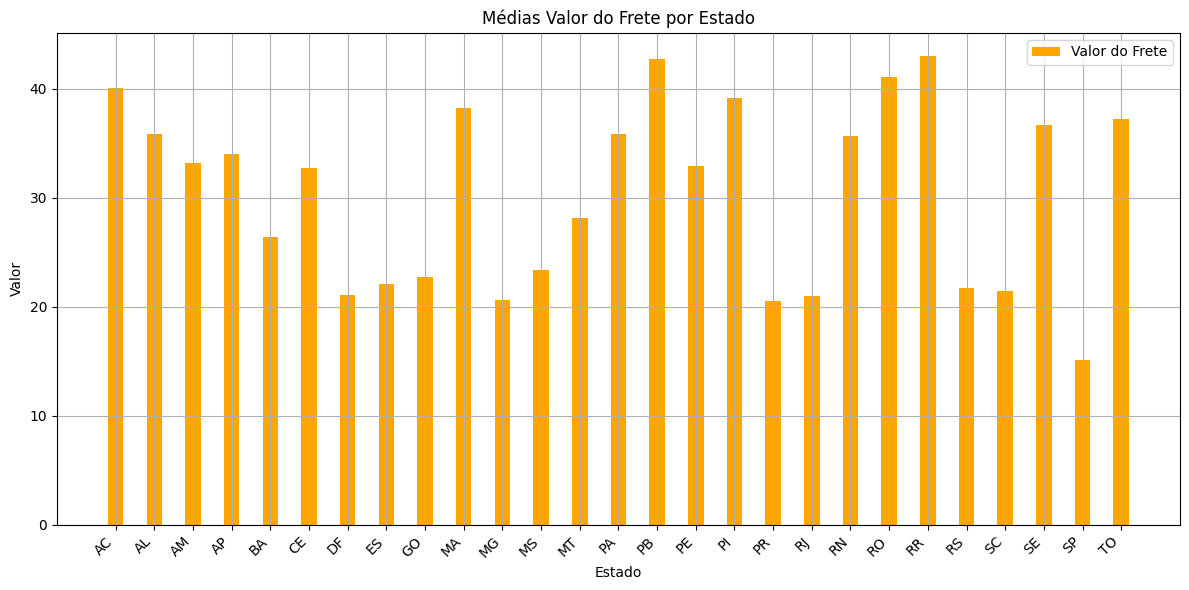

In [29]:
# Criar um gráfico de barras 

plt.figure(figsize=(12, 6))
bar_width = 0.4
plt.bar(medias_frete_dias_juncao['customer_state'], medias_frete_dias_juncao['freight_value'], width=bar_width,  color='orange', label='Valor do Frete')
plt.xlabel('Estado')
plt.ylabel('Valor')
plt.title('Médias Valor do Frete por Estado')
plt.legend()
plt.grid()
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos dos estados para melhor visualização
plt.tight_layout() #Ajusta o layout para evitar cortes no gráfico

plt.show()

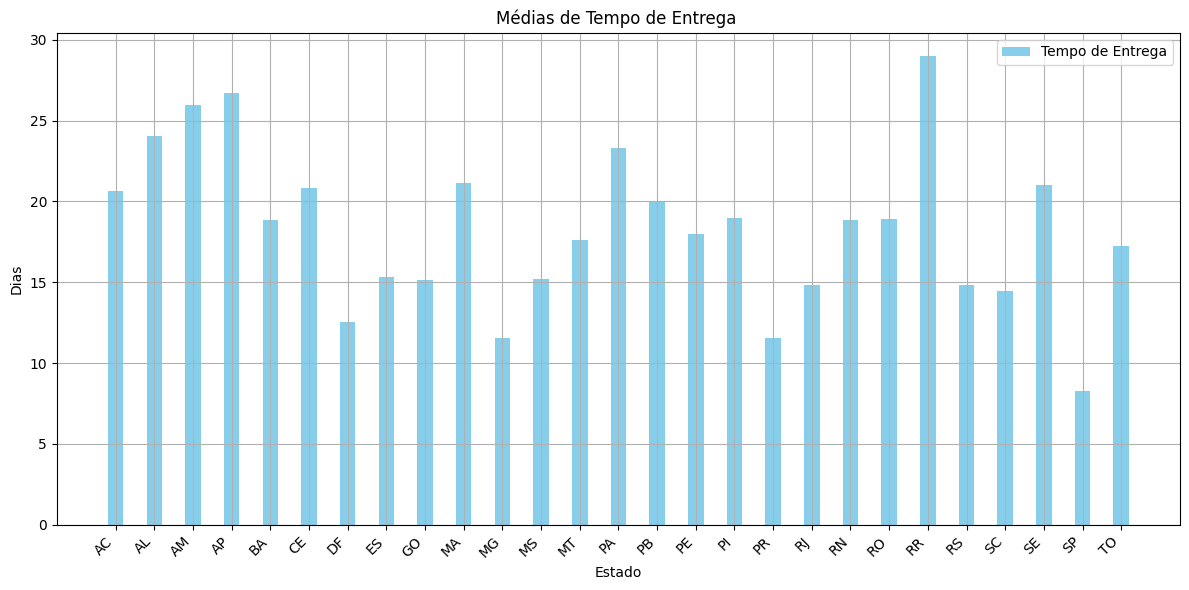

In [30]:
plt.figure(figsize=(12, 6))
plt.bar(medias_frete_dias_juncao['customer_state'], medias_frete_dias_juncao['tempo_entrega'], width=bar_width,  color='skyblue', label='Tempo de Entrega')
plt.xlabel('Estado')
plt.ylabel('Dias')
plt.title('Médias de Tempo de Entrega ')
plt.legend()
plt.grid()
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos dos estados para melhor visualização
plt.tight_layout() #Ajusta o layout para evitar cortes no gráfico

plt.show()

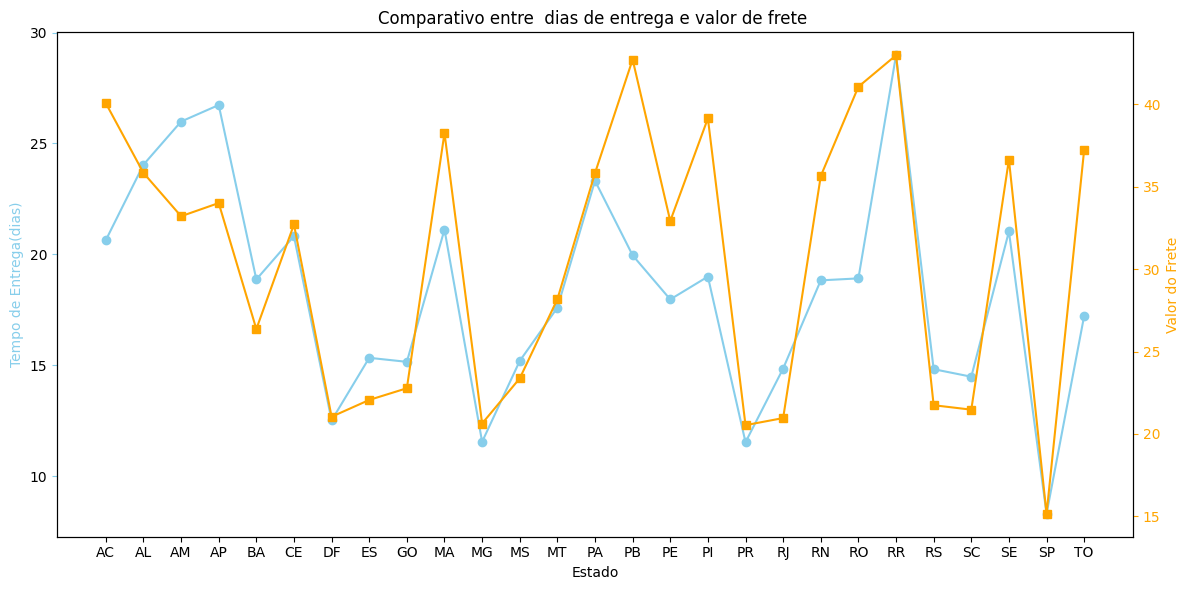

In [31]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(medias_frete_dias_juncao['customer_state'], medias_frete_dias_juncao['tempo_entrega'], marker='o', color='skyblue', label='Tempo de Entrega')
ax1.set_xlabel('Estado')
ax1.set_ylabel('Tempo de Entrega(dias)', color='skyblue')
ax1.tick_params('y', color='skyblue')


#criar segundo eixo y

ax2 = ax1.twinx()
ax2.plot(medias_frete_dias_juncao['customer_state'], medias_frete_dias_juncao['freight_value'], marker='s', color='orange', label='Valor do Frete')
ax2.set_ylabel('Valor do Frete', color='orange')
ax2.tick_params('y', colors='orange')

#criar titulo e legenda

plt.title('Comparativo entre  dias de entrega e valor de frete ')
fig.tight_layout()

plt.show()